## Decision Trees
Decision Trees are versatile ML algorithms that can perform both classification and regression and even multioutput tasks. The Decision Trees in sklearn use CART training algorithms. The CART algorithms results in Binary trees meaning any particular node can split into two children. The other training algorithms are ID3 and can be implemented with some code as there is no inbuilt procedure

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris=load_iris()
X=iris.data[:,2:] #petal length and width
y=iris.target
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Visualization of Decision Tree
The decision trees are very intuitive and are based on rules. Each split of the decision tree scans all the features and select the threshold of split by greedy approach. This guarantees that an optimal solution is resulted by CART algorithms. However the best solution of Decision Tree is a NP- Complete Problem.

##### Note : NP- Complete Probleme is both NP and NP-Hard problem. NP is the set of problems whose solution can be verified in a polynomial time. An NP-Hard problem is a problem to which any NP problem can be reduced in a polynomial time

[Text(334.8, 453.0, 'X[0] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(502.20000000000005, 271.8, 'X[1] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(334.8, 90.59999999999997, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(669.6, 90.59999999999997, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

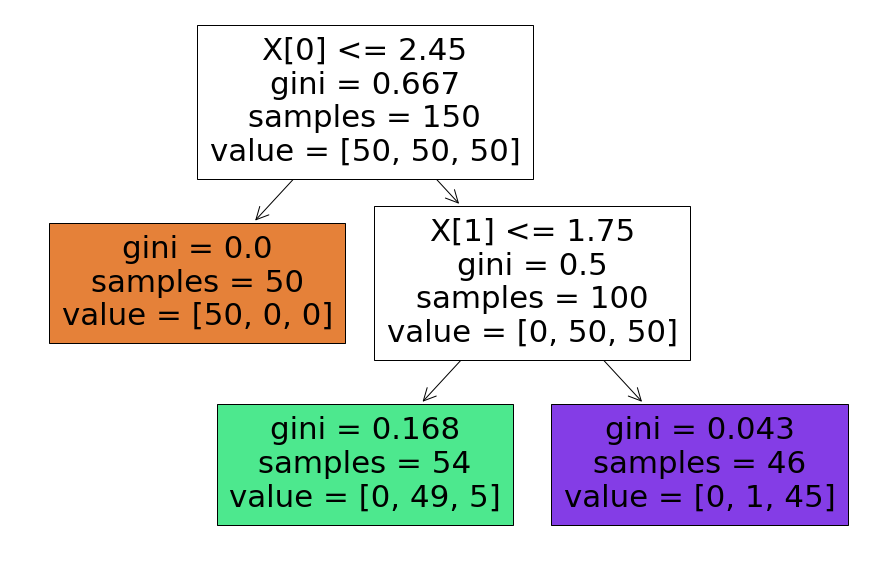

In [2]:
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf,filled=True)

## Gini Impurity and Entropy
As we discussed earlier each split in Decision Tree is based on the lowest impurity. The impurity of a node can be measured in two ways like Gini impurity and entropy. 
##### The gini impurity is calculated for a node as follows:
For example let us consider the left node at depth=2. The values are (0,49,5) and samples are 54, so now gini=1-((0/54)^2+(49/54)^2+(5/54)^2) i.e., now gini= 0.168
##### The entropy is calculated for a node as follows:
The entropy for same node is calculated as entropy=-(0/54)log(0/54)-(49/54)log(49/54)-(5/54)log(5/54)
#### Note : In practice either of the values does not make much difference on the performance of the decision tress. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees

## Computational Complexity
##### The training complexity of decision trees is O(n*m*(log(m))) where n is the number of instances and m is the number of leaf nodes
##### The prediction complexity of decision tress is O(log(m)) as we need to traverse a binary tree in which we have m leaf nodes

## Regularization Parameters
Like any other ML model decision trees can overfit the data too. So we can prevent overfitting by **reducing the depth of Decision trees like max_depth or other parameters like max_features (maximum number of features considered for split at each node), max_leaf_nodes (the maximum number of leaf nodes)**. Conversely we can prevent overfitting by **increasing the other parameters like min_samples_leaf (the minimum number of samples a leaf node must have), min_samples_split(samples a node must have before it can split)**
#### Note : The overfitting can be prevented by reducing max_* hyperparameters and increasing min_* hyperparameters. This will regularize the model
#### Pruning
Besides in Decision trees using ID3 training models or other training models we perform a statistical Chi-2 test for independence. A node whose children are all leaf nodes is considered unnecessary if the purity improvement it provides is not statistically significant. The null hypothesis is the improvement is purely the result of chance. If the probability called (p-value) is higher than a given threshold (typically 5%, controlled by a hyperparameter), then the node is considered unnecessary and its children are deleted. The pruning continues until all unnecessary nodes have been pruned. 

## Prediction Probabilities
Decision Tree Classifiers output the probability of each class that the instance can belong to. For example in the below code snippet we can see that for an instance (5,1.5) the probabilities of setosa, versicolor and virginica are (0,90.7,9) percentages and when we try to predict the result it results that the instance belong to versicolor

In [3]:
print(tree_clf.predict_proba([[5,1.5]]))
tree_clf.predict([[5,1.5]])

[[0.         0.90740741 0.09259259]]


array([1])

## DecisionTreeRegressor
The Decision Tree variant for the regression. In this variant the split is based on the MSE (Mean squared Error) unlike the impurity score.
To predict the continuous values we will traverse through the tree and the predicted value is value in the node which is simply average of all the samples prediction values present in the particular node

In [4]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
iris=load_boston()
X=iris.data[:,2:] #petal length and width
y=iris.target
tree_clf=DecisionTreeRegressor(max_depth=2)
tree_clf.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

[Text(418.5, 453.0, 'X[3] <= 6.941\nmse = 84.42\nsamples = 506\nvalue = 22.533'),
 Text(209.25, 271.8, 'X[10] <= 14.4\nmse = 40.273\nsamples = 430\nvalue = 19.934'),
 Text(104.625, 90.59999999999997, 'mse = 26.009\nsamples = 255\nvalue = 23.35'),
 Text(313.875, 90.59999999999997, 'mse = 19.276\nsamples = 175\nvalue = 14.956'),
 Text(627.75, 271.8, 'X[3] <= 7.437\nmse = 79.729\nsamples = 76\nvalue = 37.238'),
 Text(523.125, 90.59999999999997, 'mse = 41.296\nsamples = 46\nvalue = 32.113'),
 Text(732.375, 90.59999999999997, 'mse = 36.628\nsamples = 30\nvalue = 45.097')]

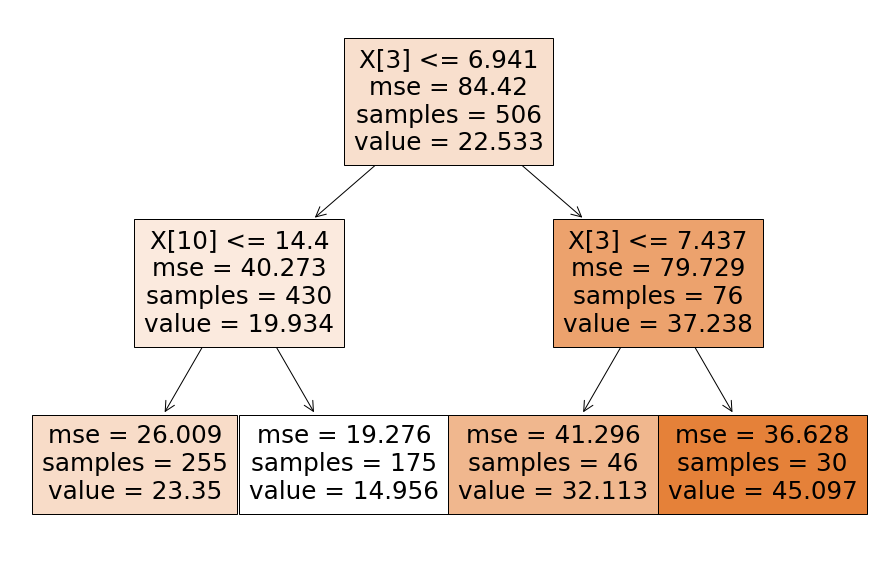

In [5]:
from sklearn import tree
#import matplotlib.pyplot as plt
#%matplotlib inline
plt.figure(figsize=(15,10))
tree.plot_tree(tree_clf,filled=True)